In [115]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

## Question 2

In [551]:
def import_data(f):
    X = np.loadtxt(f)
    return X

In [553]:
def approximate_vectors(X0, X1, dt): # returns v, where v = x1-x0 /delta t. 
    v = np.subtract(X1, X0)
    v = v / dt
    return v

In [554]:
def find_vector(x, A): #Returns A*x
    v = np.matmul(x, A)
    return v

In [555]:
def find_vectors(A_hat, x0):
    v = np.zeros([x0.shape[0], A_hat.shape[1]])
    for i in range(0, x0.shape[0]):
        v[i,:] = find_vector(x0[i:i+1, :], A_hat)
    return v

In [556]:
def least_square(x, y, rcond=None):
    Astar = np.linalg.lstsq(x, y, rcond)
    return Astar[0]

In [552]:
X0 = import_data('linear_vectorfield_data_x0.txt')
X1 = import_data('linear_vectorfield_data_x1.txt')

#### Part 1

In [568]:
vectors = approximate_vectors(X0, X1, 0.1) # v = x1-x0 /delta t. 

In [569]:
A_hat = least_square(X0, vectors)

In [570]:
A_hat = np.transpose(A_hat)

In [571]:
print(A_hat)

[[-0.49355245  0.23191153]
 [-0.4638232  -0.95737573]]


In [572]:
v_hat = find_vectors(A_hat, X0) #Finding A*x with estimated matrix A. 

#### Part 2

In [573]:
X1_hat = np.dot(v_hat, 0.1) + X0 #Estimated X1 values.

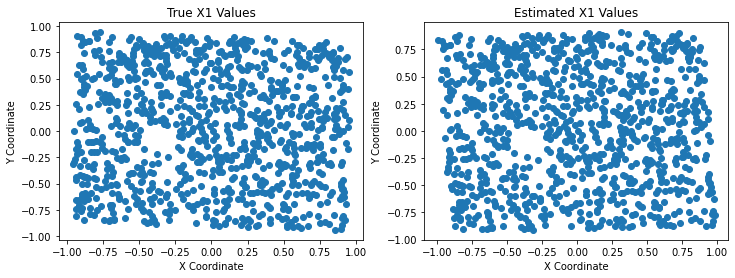

In [574]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(X1[:,0],X1[:,1])
ax1.set_title('True X1 Values')
ax1.set_xlabel('X Coordinate')
ax1.set_ylabel('Y Coordinate')

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(X1_hat[:,0],X1_hat[:,1])
ax2.set_title('Estimated X1 Values')
ax2.set_xlabel('X Coordinate')
ax2.set_ylabel('Y Coordinate')

plt.show()

In [575]:
#Mean Squared Error between x1 and estimated x1.

In [627]:
def mean_sq_error(a,b):
    e = np.sum(np.sum(np.square(a - b), axis = 1)) / a.shape[0]
    return e

In [628]:
e = mean_sq_error(X1, X1_hat)
print(e)

0.0032812917461397207


#### Part 3

In [596]:
def trajectory(t, x): #Provides A*x, which is the vector.
    xt = find_vector(x, A_hat)
    return xt

In [597]:
#Solving the System for T = 100 timesteps. 
t0 = 0 
tend = 100
t = np.linspace(t0, tend, tend-t0)
initial = [10,10]
rtol = 1e-8
atol = 1e-8
sol = solve_ivp(trajectory, t_span = [t[0], t[-1]], y0 = initial, t_eval = t, rtol = rtol, atol = atol)

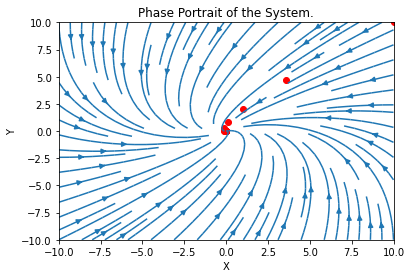

In [598]:
#Printing the Phase Portrait and Trajectory of the System. 
w = 10
y_axis, x_axis = np.mgrid[-w:w:100j, -w:w:100j]
U = A_hat2[0,0] * x_axis + A_hat2[0,1] * y_axis
V = A_hat2[1,0] * x_axis + A_hat2[1,1] * y_axis 
plt.streamplot(x_axis, y_axis, U, V)
plt.xlim(-10, 10)
plt.ylim(-10,10)
plt.scatter(sol.y[0], sol.y[1], c = 'red')
plt.title('Phase Portrait of the System.')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Question 3

#### Part 1

In [602]:
n_X0 = import_data('nonlinear_vectorfield_data_x0.txt')
n_X1 = import_data('nonlinear_vectorfield_data_x1.txt')

In [636]:
n_vectors = approximate_vectors(n_X0, n_X1, 0.00025) # v = x1-x0/ delta t

In [637]:
A_nonlin = least_square(n_X0, n_X1) # Finding A that will minimize the Least Squared Error.

In [638]:
print(A_nonlin)

[[ 9.89983988e-01  8.67271579e-04]
 [-2.53494232e-04  9.56732862e-01]]


In [639]:
# Obtaining estimated vectors by calculating A*x. 
v_estimated = find_vectors(np.transpose(A_nonlin), n_X0)


#x1 = x0 + v * delta t. 
f_x1 = v_estimated * 0.00025 + n_X0 

In [662]:
e = mean_sq_error(n_X1, f_x1)
print('MSE between true X1 and estimated X1: ', e)

MSE between true X1 and estimated X1:  0.05070129640845775


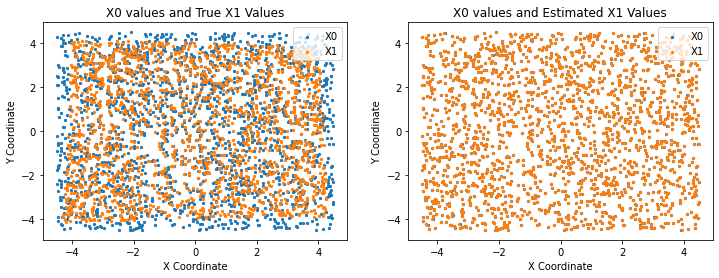

In [661]:
fig = plt.figure(figsize = (12,4))
ax1 = fig.add_subplot(1,2,1)
ax1.scatter(n_X0[:,0],n_X0[:,1], s = 5, label = 'X0')
ax1.scatter(n_X1[:,0],n_X1[:,1], s = 5, label = 'X1')
ax1.set_title('X0 values and True X1 Values')
ax1.set_xlabel('X Coordinate')
ax1.set_ylabel('Y Coordinate')
ax1.legend(loc = 1, facecolor = 'white')

ax2 = fig.add_subplot(1,2,2)
ax2.scatter(n_X0[:,0],n_X0[:,1], s = 5,label = 'X0')
ax2.scatter(f_x1[:,0],f_x1[:,1], s = 5, label = 'X1')
ax2.set_title('X0 values and Estimated X1 Values')
ax2.set_xlabel('X Coordinate')
ax2.set_ylabel('Y Coordinate')
ax2.legend(loc = 1 , facecolor = 'white')
plt.show()

#### Part 2

In [157]:
def get_distance(x_l, X) :
    d_mat = np.zeros(X.shape)
    d_mat = (x_l-X)**2 # square distance
    d_mat = np.sum(d_mat, axis = 1)
    return d_mat

In [158]:
def create_basis(X, L):
    basis = np.zeros((L, X.shape[1]))
    rand_arr = np.random.choice(X.shape[0], L, replace=False) # generate L number of indices randomly
    indices = np.sort(rand_arr) # then sort them
    for i in range(0, L):
        x_l = X[indices[i]] # get a randomly selected data point as center basis
        basis[i]= x_l
    distance = np.zeros((L, L))
    for i in range(0, L):
        dist = get_distance(basis[i], basis) # distance array
        distance[i, :] = dist
        
    eps = 0.05 * np.max(distance) # calculate epsilon
    return basis, eps

In [159]:
# calculating radial basis functions, numpy array X: data points, scalar L
def get_RBF(X, L, basis, eps):
    RBF = np.zeros((X.shape[0], L)) # initialize
    for i in range(L):
        dist = get_distance(basis[i], X) # distance array
        RBF[:, i] = dist
    epsilon = eps ** 2
    RBF = RBF / epsilon # divide the distance with epsilon
    RBF = np.exp(-RBF) # take exponential
    return RBF

In [700]:
# Trying the method with L = 100 Delta t = 0.00025 to compare with Linear Approximation.

In [706]:
L = 100
basis, epsilon = create_basis(n_X0,L)
rbf_x0 = get_RBF(n_X0, L, basis, epsilon)
n_vectors = approximate_vectors(n_X0, n_X1, 0.00025)
C_hat = least_square(rbf_x0, n_vectors)

In [707]:
f_rbf = find_vectors(C_hat, rbf_x0)
fn_x1 = f_rbf * 0.00025 + n_X0

In [711]:
e1 = mean_sq_error(n_X1, fn_x1)
print('MSE between true X1 and estimated X1 (by RBF): ', e1)
print('-------------------------------------------------------------------------------')
f_x1_lin = v_estimated * 0.00025 + n_X0 
e2 = mean_sq_error(n_X1, f_x1_lin)
print('MSE between true X1 and estimated X1 (by Linear Approx.): ', e2)

MSE between true X1 and estimated X1 (by RBF):  2.6102807847901058e-11
-------------------------------------------------------------------------------
MSE between true X1 and estimated X1 (by Linear Approx.):  0.05070129640845775


In [704]:
#Trying With Different L values when Delta t = 0.1

In [690]:
L_list = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
for i in range(0, len(L_list)):
    L = L_list[i]
    basis, epsilon = create_basis(n_X0,L)
    rbf_x0 = get_RBF(n_X0, L, basis, epsilon)
    n_vectors = approximate_vectors(n_X0, n_X1, 0.1)
    C_hat = least_square(rbf_x0, n_vectors)
    f_rbf = find_vectors(C_hat, rbf_x0)
    fn_x1 = f_rbf * 0.1 + n_X0
    vf_mse = mean_sq_error(n_vectors, f_rbf)
    x1_mse = mean_sq_error(n_X1, fn_x1)
    print('L:   ', L)
    print('MSE between Calculated and Approximated Vector Field: ', vf_mse)
    print('MSE between True and Approximated X1: ', x1_mse)
    print('-------------------------------------------------------------------------------')

L:    100
MSE between Calculated and Approximated Vector Field:  2.2529987934231924e-09
MSE between True and Approximated X1:  2.2529987934248552e-11
-------------------------------------------------------------------------------
L:    200
MSE between Calculated and Approximated Vector Field:  1.6287012645967256e-09
MSE between True and Approximated X1:  1.6287012645981355e-11
-------------------------------------------------------------------------------
L:    300
MSE between Calculated and Approximated Vector Field:  1.4872655721020031e-09
MSE between True and Approximated X1:  1.487265572098802e-11
-------------------------------------------------------------------------------
L:    400
MSE between Calculated and Approximated Vector Field:  2.38055637034359e-09
MSE between True and Approximated X1:  2.3805563703421062e-11
-------------------------------------------------------------------------------
L:    500
MSE between Calculated and Approximated Vector Field:  4.841820551306114e

In [533]:
def obtain_basis(x, basis, eps, C_hat):
    epsilon = eps ** 2
    phi = get_distance(x, basis) / epsilon
    phi = np.exp(-phi)
    return phi

In [534]:
def solve_system(t, x, basis, epsilon, C_hat):
    phi = obtain_basis(x, basis, epsilon, C_hat)
    xt = np.matmul(phi, C_hat)
    return xt

In [535]:
L = 100
basis, epsilon = create_basis(n_X0,L)
rbf_x0 = get_RBF(n_X0, L, basis, epsilon)
n_vectors = approximate_vectors(n_X0, n_X1, 0.1)
C_hat = least_square(rbf_x0, n_vectors)

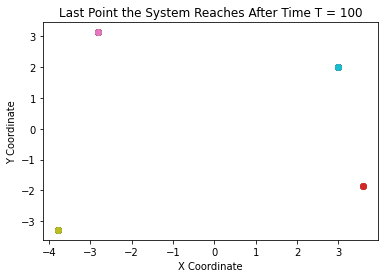

In [539]:
t0 = 0
tend = 100
t = np.linspace(t0, tend, tend-t0)
rtol = 1e-8
atol = 1e-8
last_pt = np.zeros((n_X0.shape[0], 2))
for i in range(0, n_X0.shape[0]):
    initial = n_X0[i,:]
    sol = solve_ivp(solve_system, t_span = [t[0], t[-1]], y0 = initial, args = (basis, epsilon, C_hat),t_eval = t, rtol = rtol, atol = atol)
    last_pt[i,0] = sol.y[0][-1]
    last_pt[i,1] = sol.y[1][-1]
    plt.scatter(sol.y[0][-1], sol.y[1][-1])
plt.title('Last Point the System Reaches After Time T = 100')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

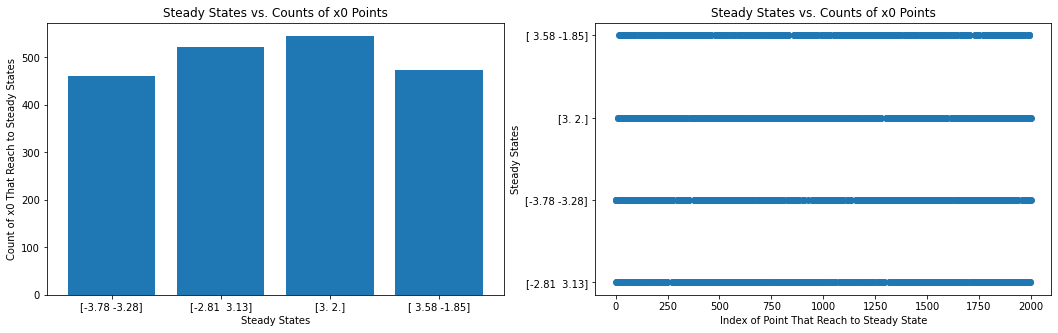

In [548]:
fig = plt.figure(figsize = (18,5))
ax1 = fig.add_subplot(1,2,1)
last_pt = np.round(last_pt, 2)
unique = np.unique(last_pt, axis = 0, return_counts = True)

str_elements = []
for i in range(0, unique[0].shape[0]):
    str_elements.append(str(unique[0][i,:]))
ax1.bar(str_elements,unique[1])
ax1.set_title('Steady States vs. Counts of x0 Points')
ax1.set_xlabel('Steady States')
ax1.set_ylabel('Count of x0 That Reach to Steady States')

ax2 = fig.add_subplot(1,2,2)
str_elements = []
for i in range(0, last_pt.shape[0]):
    str_elements.append(str(last_pt[i,:]))
ax2.scatter(np.arange(0, len(str_elements)),str_elements)
ax2.set_title('Steady States vs. Counts of x0 Points')
ax2.set_ylabel('Steady States')
ax2.set_xlabel('Index of Point That Reach to Steady State')
plt.show()

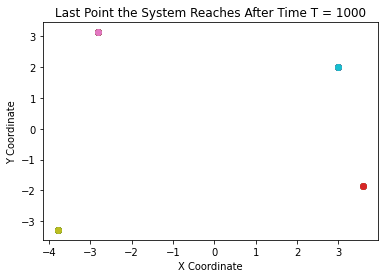

In [549]:
t0 = 0
tend = 1000
t = np.linspace(t0, tend, tend-t0)
rtol = 1e-8
atol = 1e-8
last_pt2 = np.zeros((n_X0.shape[0], 2))
for i in range(0, n_X0.shape[0]):
    initial = n_X0[i,:]
    sol2 = solve_ivp(solve_system, t_span = [t[0], t[-1]], y0 = initial, args = (basis, epsilon, C_hat),t_eval = t, rtol = rtol, atol = atol)
    last_pt2[i,0] = sol2.y[0][-1]
    last_pt2[i,1] = sol2.y[1][-1]
    plt.scatter(sol2.y[0][-1], sol2.y[1][-1])
plt.title('Last Point the System Reaches After Time T = 1000')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()

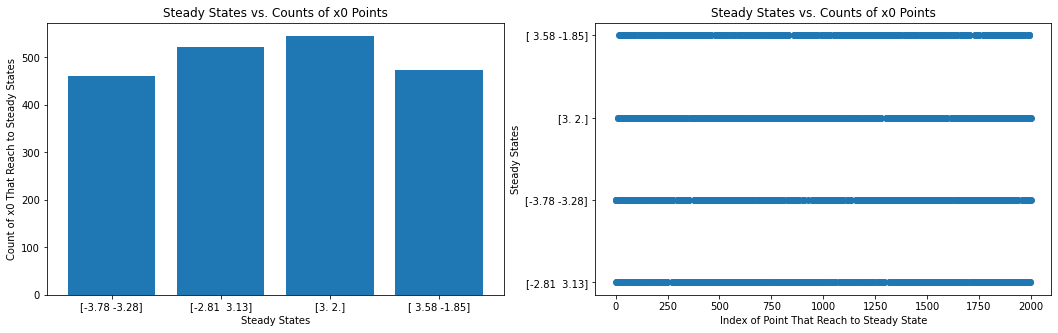

In [550]:
fig = plt.figure(figsize = (18,5))
ax1 = fig.add_subplot(1,2,1)
last_pt2 = np.round(last_pt2, 2)
unique2 = np.unique(last_pt2, axis = 0, return_counts = True)

str_elements2 = []
for i in range(0, unique2[0].shape[0]):
    str_elements2.append(str(unique2[0][i,:]))
ax1.bar(str_elements2,unique2[1])
ax1.set_title('Steady States vs. Counts of x0 Points')
ax1.set_xlabel('Steady States')
ax1.set_ylabel('Count of x0 That Reach to Steady States')

ax2 = fig.add_subplot(1,2,2)
str_elements2 = []
for i in range(0, last_pt2.shape[0]):
    str_elements2.append(str(last_pt2[i,:]))
ax2.scatter(np.arange(0, len(str_elements2)),str_elements2)
ax2.set_title('Steady States vs. Counts of x0 Points')
ax2.set_ylabel('Steady States')
ax2.set_xlabel('Index of Point That Reach to Steady State')
plt.show()

## Question 5

In [714]:
import pandas as pd
X = pd.read_csv("MI_timesteps.txt", sep=" ").to_numpy()

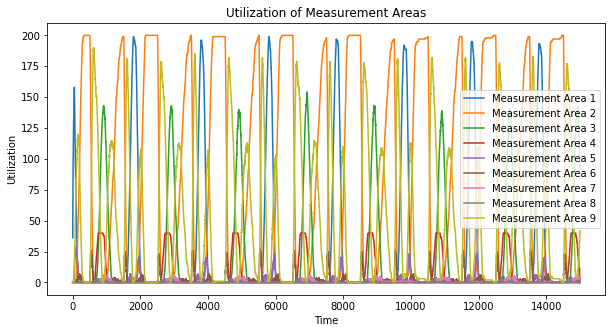

In [749]:
fig = plt.figure(figsize = (10,5))
t = np.arange(0, X.shape[0])
for i in range(1, X.shape[1]):
    plt.plot(t, X[:,i], label = 'Measurement Area '+str(i))
plt.title("Utilization of Measurement Areas")
plt.xlabel("Time")
plt.ylabel("Utilization")
plt.legend()
plt.show()

#### Part 1

In [715]:
# Preparing the dataset for calculations. 
# Cropping the first 1000 rows and only working with 2-3-4. columns.

In [716]:
X_reduced = X[1001:, 1:4]
print(X_reduced.shape)

(14000, 3)


In [720]:
X_window = np.zeros((351*38, 1053)) #Obtaining the delay embedding 
X_reduced = X[1001:, 1:4]
for i in range(0, 351*38):
    window = X_reduced[i:i+351, :] # creating windows of 351 values and reshaping them to a 1053 dimensional vectors.
    window = window.reshape(1,1053)
    X_window[i, :] = window

In [721]:
X_window.shape

(13338, 1053)

In [722]:
X_window = X_window.astype(int)

In [723]:
from numpy.linalg import svd #Applying PCA to delay embedding.
X_window = X_window - X_window.mean(axis=0) # center
U, S, Vt = svd(X_window, full_matrices=True) # calculate svd

In [724]:
Xb = np.matmul(X_window, np.transpose(Vt)) #Obtaining the new embedding from PCA.
Xb[:,0:3]

array([[  17.02322691, -909.82583987, -417.86963917],
       [   7.71549993, -910.46537225, -413.62792443],
       [  -1.58970358, -911.03673089, -409.4129662 ],
       ...,
       [-893.59858367, 1373.06484364,  -13.77768142],
       [-882.40452309, 1378.42629567,  -15.06437018],
       [-871.18759885, 1383.68216114,  -16.34891056]])

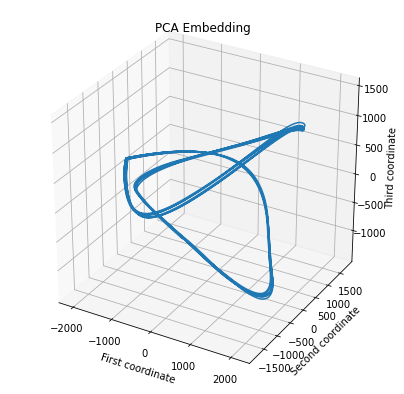

In [744]:
fig = plt.figure(figsize = (7,7)) 
ax1 = fig.add_subplot(111, projection='3d')
ax1.plot(Xb[:,0], Xb[:,1], Xb[:,2])
ax1.set_title('PCA Embedding')
ax1.set_xlabel('First coordinate')
ax1.set_ylabel('Second coordinate')
ax1.set_zlabel('Third coordinate')
plt.show()

In [774]:
#Rotated versions of the same graph to understand the shape.

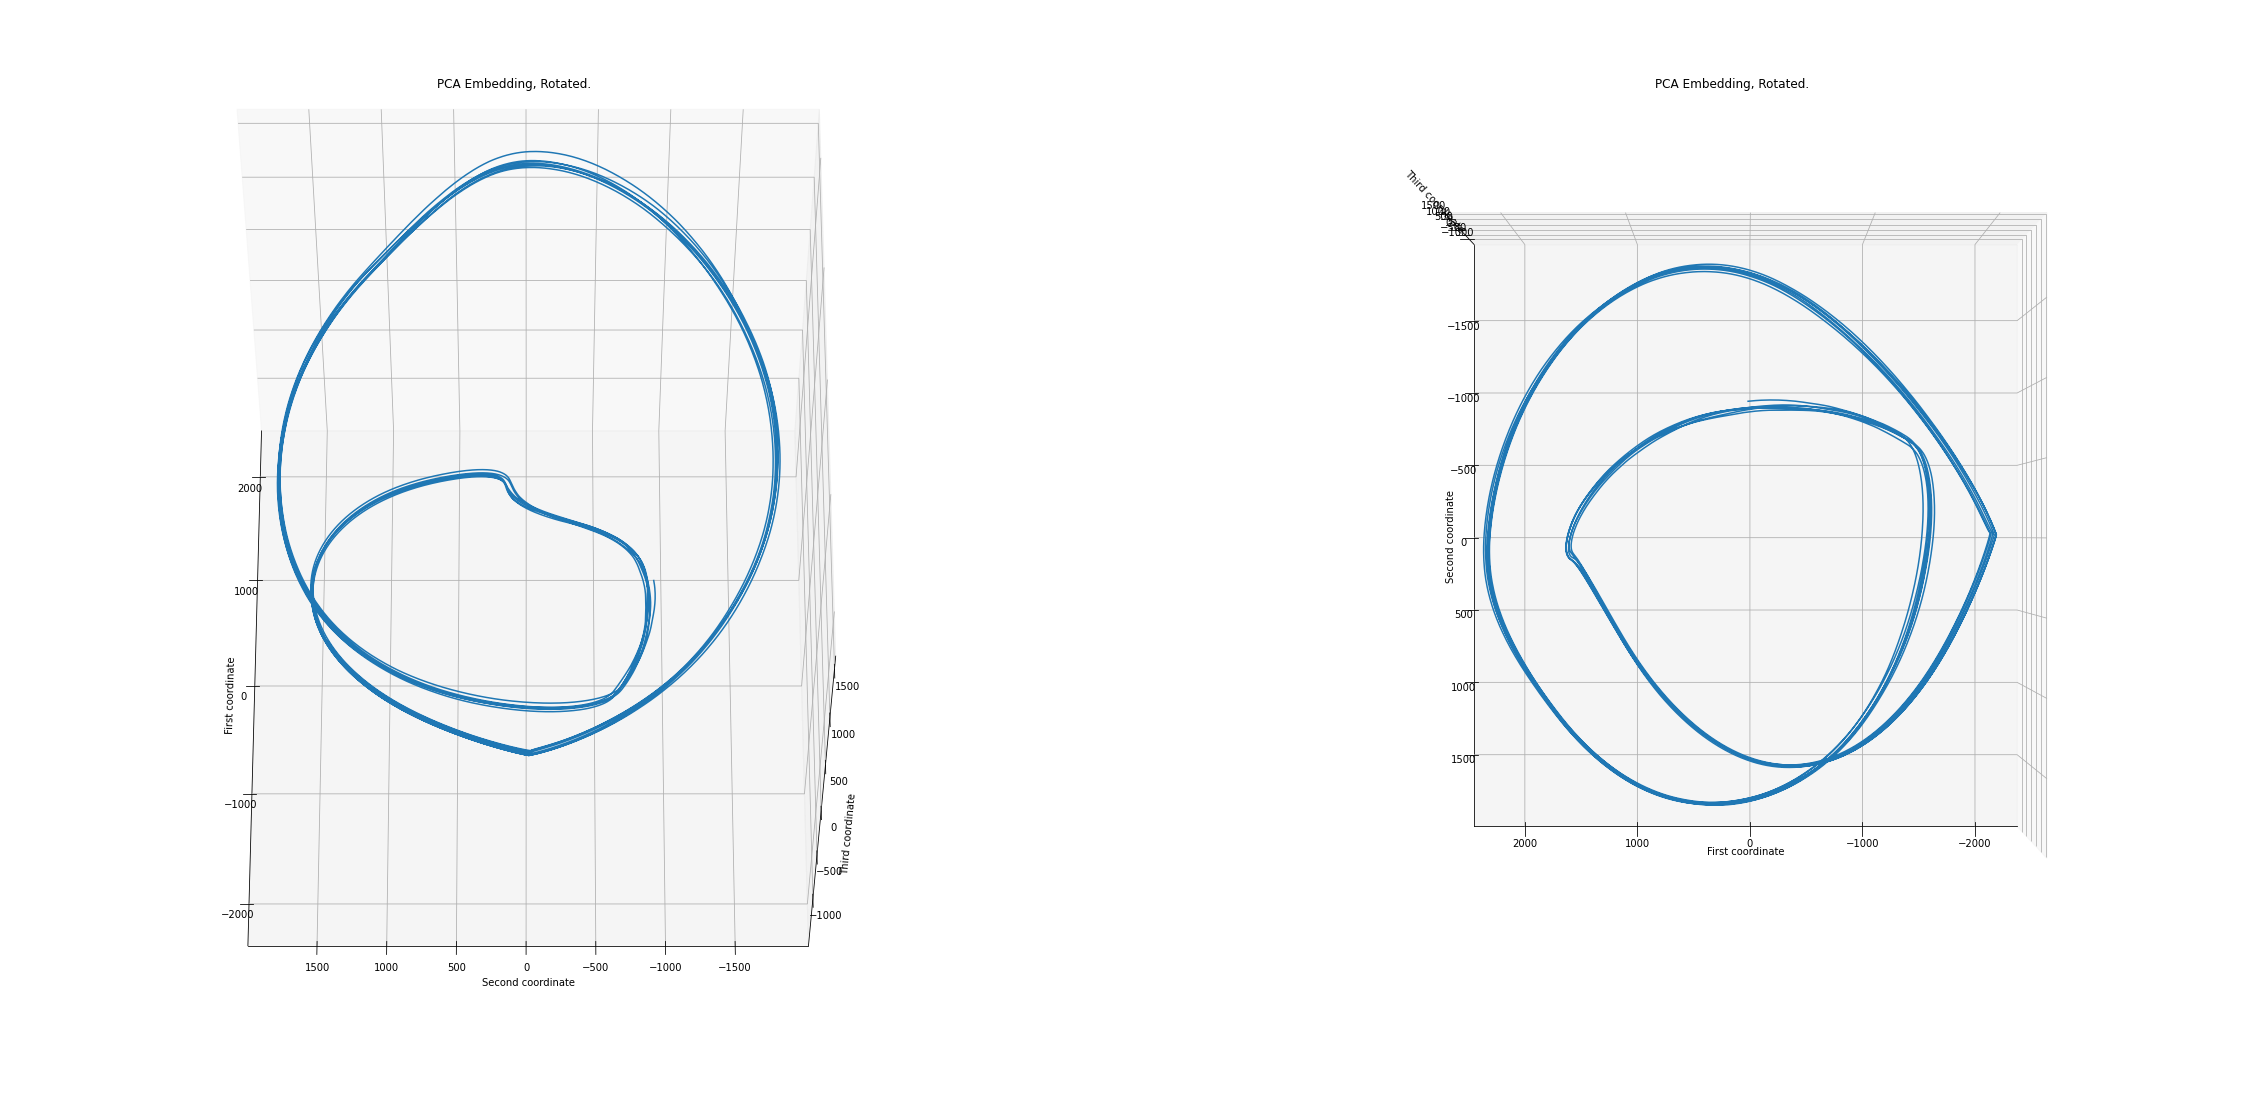

In [743]:
fig = plt.figure(figsize = (40,20)) 
ax2 = fig.add_subplot(1,2,1, projection='3d')
ax2.plot(Xb[:,0], Xb[:,1], Xb[:,2])
ax2.view_init(60, 180)
ax2.set_title('PCA Embedding, Rotated.')
ax2.set_xlabel('First coordinate')
ax2.set_ylabel('Second coordinate')
ax2.set_zlabel('Third coordinate')
ax3 = fig.add_subplot(1,2,2, projection='3d')
ax3.plot(Xb[:,0], Xb[:,1], Xb[:,2])
ax3.view_init(90, 90)
ax3.set_title('PCA Embedding, Rotated.')
ax3.set_xlabel('First coordinate')
ax3.set_ylabel('Second coordinate')
ax3.set_zlabel('Third coordinate')
plt.show()

#### Part 2

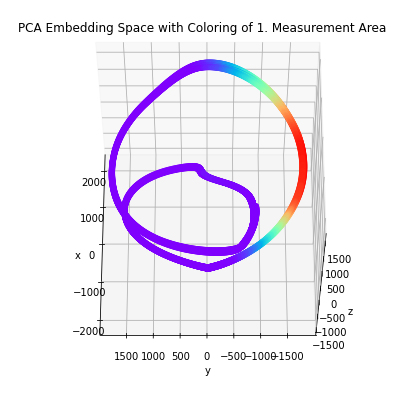

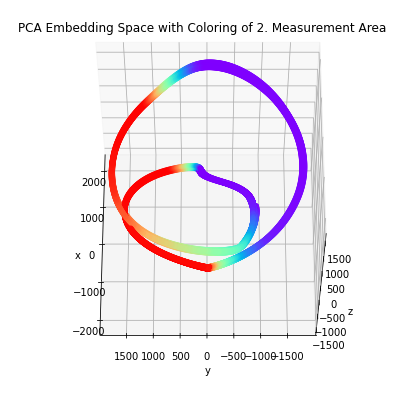

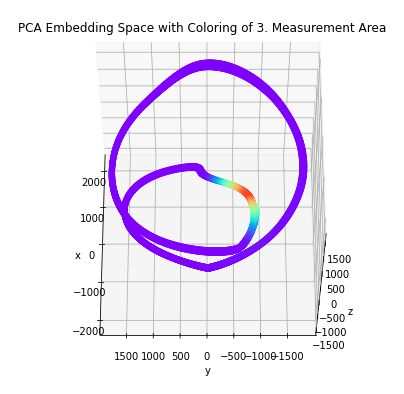

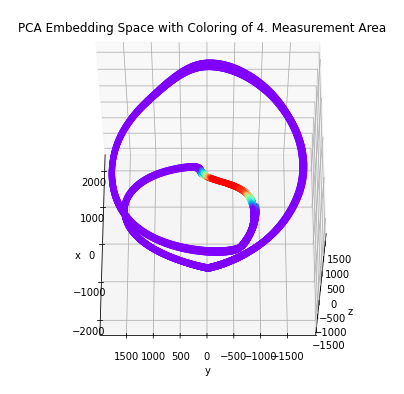

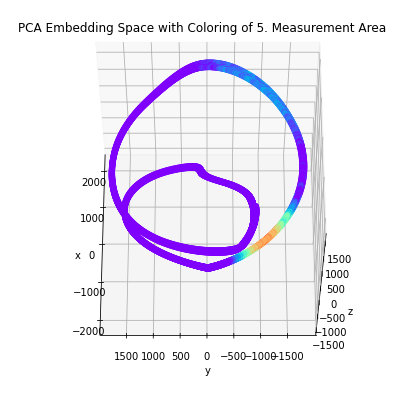

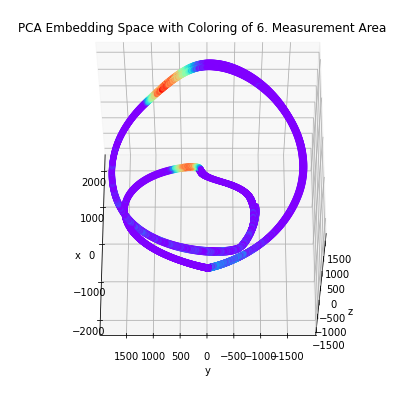

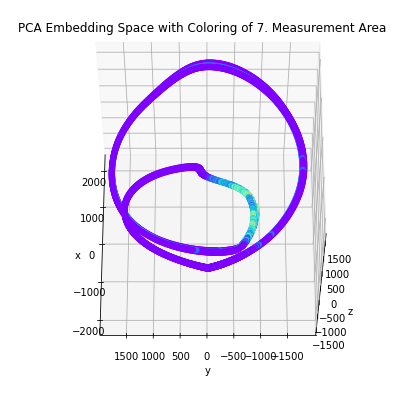

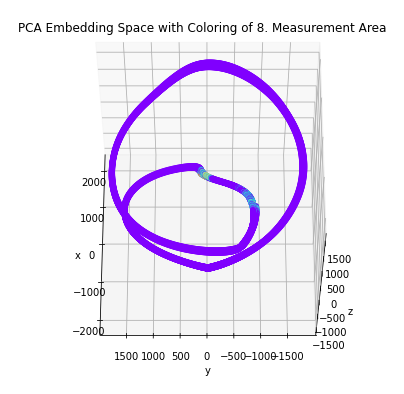

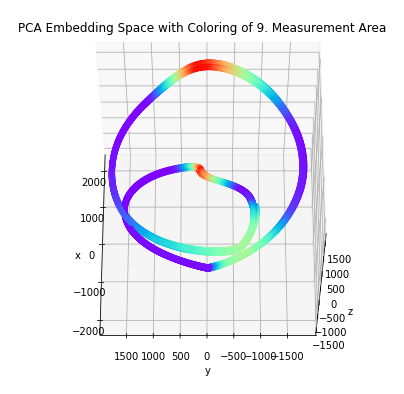

In [745]:
cmap = plt.cm.rainbow
X_plot = X[1001:, :]
for i in range(1, X_plot.shape[1]):
    dot_color = X_plot[0:Xb.shape[0],i:i+1]
    fig = plt.figure(figsize = (7,7))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(Xb[:,0], Xb[:,1], Xb[:,2], cmap = cmap, c=dot_color[:])
    ax.view_init(60, 180)
    ax.set_title("PCA Embedding Space with Coloring of "+str(i)+". Measurement Area")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")

#### Part3

In [751]:
# Below figures are plotted to see whether the curve is periodic and the periods of the curve. 
# It can be concluded that in every 2000 points, one period is completed.

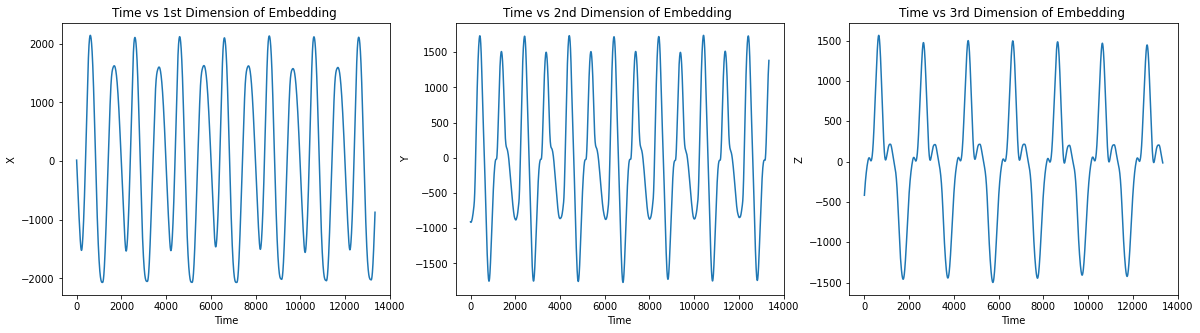

In [752]:
fig = plt.figure(figsize = (20,5))
ax1 = fig.add_subplot(1,3,1)
counts = np.arange(0, Xb.shape[0])
ax1.plot(counts, Xb[:,0])
ax1.set_title("Time vs 1st Dimension of Embedding ")
ax1.set_xlabel('Time')
ax1.set_ylabel('X')

ax2 = fig.add_subplot(1,3,2)
ax2.plot(counts, Xb[:,1])
ax2.set_title("Time vs 2nd Dimension of Embedding ")
ax2.set_xlabel('Time')
ax2.set_ylabel('Y')

ax3 = fig.add_subplot(1,3,3)
ax3.plot(counts, Xb[:,2])
ax3.set_title("Time vs 3rd Dimension of Embedding ")
ax3.set_xlabel('Time')
ax3.set_ylabel('Z')
plt.show()

In [755]:
# In below cell, arclength space is obtained by calculating the distances between two consecutive points.
# So, we obtained 1 dimensional arclength space.

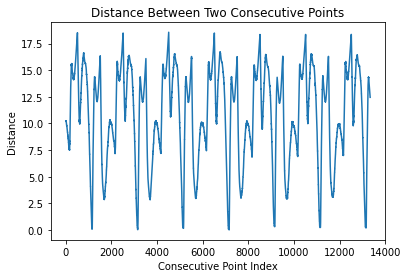

In [773]:
X_dist = Xb[:,0:3]
vector_field = np.zeros((X_dist.shape[0]-1, 1))
for i in range(0, X_dist.shape[0]-1): # sqrt((x1-x0)^2)
    d = X_dist[i+1,:] - X_dist[i,:] 
    d = d ** 2
    vector_field[i,:] = np.sqrt(np.sum(d))
    
indices = np.arange(0,(X_dist.shape[0]-1))    
plt.plot(indices, vector_field[:,0])
plt.title('Distance Between Two Consecutive Points')
plt.xlabel('Consecutive Point Index')
plt.ylabel('Distance')
plt.show()

In [357]:
#In every 2000 points, the distances are the same, hence, periodic. 

In [762]:
L_5 = 100
vector_field = vector_field[0:2000,:]
basis_5, epsilon_5 = create_basis(vector_field[0:1999, :],L_5)
rbf_x0_5 = get_RBF(vector_field[0:1999, :], L_5, basis_5, epsilon_5)
n_vectors_5 = approximate_vectors(vector_field[0:1999, :], vector_field[1:2000, :], 1)
C_hat_5 = least_square(rbf_x0_5, n_vectors_5)
v = find_vector(rbf_x0_5, C_hat_5)

In [763]:
e = mean_sq_error(n_vectors_5, v)
print('MSE :', e)

MSE : 0.006190839330592562


In [771]:
#Graphs of estimated and true vectors. These graphs show the similarity and relation between the vector fields.

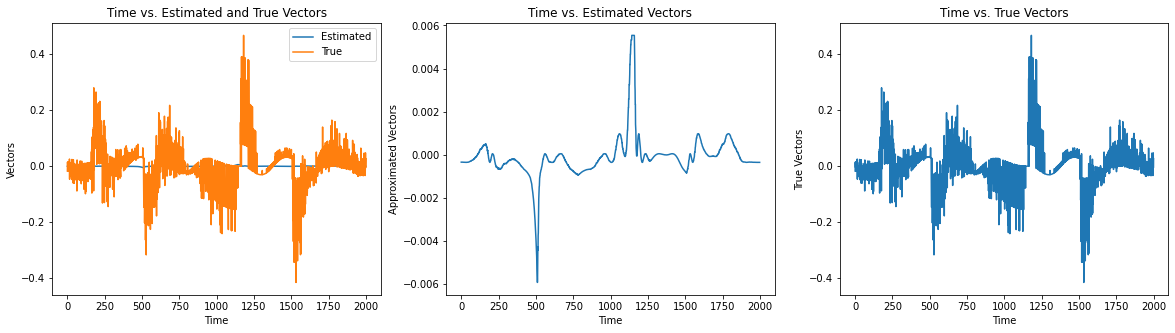

In [770]:
t = np.arange(0,v.shape[0])
fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(1, 3, 1)
ax.plot(t,v[:,0], label = 'Estimated')
ax.plot(t,n_vectors_5[:,0],  label = 'True')
ax.set_title('Time vs. Estimated and True Vectors')
ax.set_xlabel('Time')
ax.set_ylabel('Vectors')
ax.legend()
ax2 = fig.add_subplot(1, 3, 2)
ax2.plot(t,v[:,0])
ax2.set_title('Time vs. Estimated Vectors')
ax2.set_xlabel('Time')
ax2.set_ylabel('Approximated Vectors')
ax3 = fig.add_subplot(1, 3, 3)
ax3.plot(t,n_vectors_5[:,0])
ax3.set_title('Time vs. True Vectors')
ax3.set_xlabel('Time')
ax3.set_ylabel('True Vectors')
plt.show()